In [161]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

BASE MONETARIA

In [162]:
import requests
#El Archivo tiene los nombres de las hojas como Unnamed 1, 2 etc... salvo la hoja de las fechas que se llama C60 en Base Monetaria

# Descargar el archivo de Excel desde la URL
url = "https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/series.xlsm"
response = requests.get(url)

# Cargar solo la hoja "BASE MONETARIA" y las columnas "Fecha" y "Base Monetaria más cuasimonedas"
sheet_name = "BASE MONETARIA"
usecols = ["C60", "Unnamed: 30"]
df = pd.read_excel(response.content, sheet_name=sheet_name, usecols=usecols, parse_dates=["C60"]) #date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d'))



In [163]:

BM = pd.DataFrame(df)
BM = BM.iloc[8:]
new_columns = ["Fecha", "Total Base Monetaria"]
BM.columns = new_columns
BM['Fecha'] = pd.to_datetime(BM['Fecha'])
#BM['Fecha'] = BM['Fecha'].dt.strftime('%d/%m/%Y')
# resetear el índice anteriormente existente
BM = BM.reset_index(drop=True)

RESERVAS INTERNACIONALES

In [165]:


# Descargar el archivo de Excel desde la URL
url = "https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/series.xlsm"
response = requests.get(url)

# Cargar solo la hoja "RESERVAS" y las columnas "Fecha" y "Total Reservas". En ese caso, la columna fecha se llama C76
sheet_name = "RESERVAS"
usecols = ["C76", "Unnamed: 2"]
df = pd.read_excel(response.content, sheet_name=sheet_name, usecols=usecols, parse_dates=["C76"]) #date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d'))


In [166]:

RI = pd.DataFrame(df)
RI = RI.iloc[8:]
new_columns = ["Fecha", "Total Reservas Internacionales"]
RI.columns = new_columns
RI['Fecha'] = pd.to_datetime(RI['Fecha'])
#RI['Fecha'] = RI['Fecha'].dt.strftime('%d/%m/%Y')
# resetear el índice anteriormente existente
RI = RI.reset_index(drop=True)

In [167]:
#RI = RI.set_index('Fecha')


Text(0, 0.5, 'Reservas (en millones)')

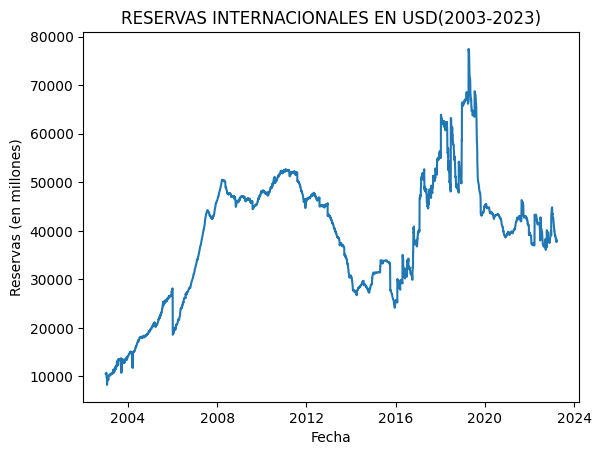

In [295]:
#Visualizar la nueva columna

# CreO una figura y un eje
fig, ax = plt.subplots()

# Grafico la serie de tiempo
ax.plot(RI['Fecha'], RI['Total Reservas Internacionales'])

# Personalización la apariencia del gráfico
ax.set_xlabel('Fecha')
ax.set_title('RESERVAS INTERNACIONALES EN USD(2003-2023)')

# Cambiar la escala del eje y a millones
ax.ticklabel_format(axis='y', style='sci' )
ax.yaxis.offsetText.set_visible(False)
ax.set_ylabel('Reservas (en millones)')


PASIVOS DEL BANCO CENTRAL


In [253]:
# Descargar el archivo de Excel desde la URL
url = "https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/series.xlsm"
response = requests.get(url)

# Cargo solo la hoja "INSTRUMENTOS DEL BCRA" y las columnas "Fecha" y las que tienen que ver con Lebac, Leliqs y Pases. 
#En este caso la columna Fecha es B44
sheet_name = "INSTRUMENTOS DEL BCRA"
usecols = ["B44", "Unnamed: 1","Unnamed: 4","Unnamed: 5"]
df = pd.read_excel(response.content, sheet_name=sheet_name, usecols=usecols, parse_dates=["B44"]) #date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d'))


In [254]:

Pasivos = pd.DataFrame(df)
Pasivos = Pasivos.iloc[8:]
new_columns = ["Fecha", "Total Pases", "Total Leliqs", "Total Lebacs y Nobac"]
Pasivos.columns = new_columns
Pasivos['Fecha'] = pd.to_datetime(Pasivos['Fecha'])
# Para resetear el índice anteriormente existente
Pasivos = Pasivos.reset_index(drop=True)


In [255]:
Pasivos= Pasivos.replace([np.nan, 's/o'], 0)

In [256]:
Pasivos['Total Lebacs y Nobac'] = Pasivos['Total Lebacs y Nobac'].astype(float)
Pasivos['Total Pases'] = Pasivos['Total Pases'].astype(float)


# reemplazar los valores no numéricos por NaN
Pasivos['Total Leliqs'] = pd.to_numeric(Pasivos['Total Leliqs'], errors='coerce')

# convertir la columna a flotante
Pasivos['Total Leliqs'] = Pasivos['Total Leliqs'].astype(float)

In [257]:
#Al DataFrame Pasivos, voy a agregarle una columna que se llama suma de pasivos 

Pasivos['Suma Pasivos'] = (Pasivos['Total Pases'] + Pasivos['Total Leliqs'] + Pasivos['Total Lebacs y Nobac']) 

In [258]:
Pasivos['Suma Pasivos'] = Pasivos['Suma Pasivos'].astype(float)

Text(0, 0.5, 'Suma Pasivos (en billones)')

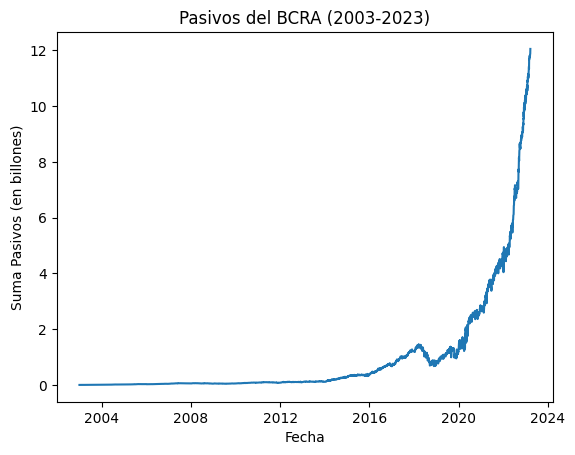

In [285]:
#Visualizar la nueva columna

# CreO una figura y un eje
fig, ax = plt.subplots()

# Grafico la serie de tiempo
ax.plot(Pasivos['Fecha'], Pasivos['Suma Pasivos'])

# Personalización la apariencia del gráfico
ax.set_xlabel('Fecha')
ax.set_title('Pasivos del BCRA (2003-2023)')

# Cambiar la escala del eje y a millones
ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
ax.yaxis.offsetText.set_visible(False)
ax.set_ylabel('Suma Pasivos (en billones)')


DEPOSITOS DEL SECTOR PRIVADO

In [203]:
# Descargar el archivo de Excel desde la URL
url = "https://www.bcra.gob.ar/Pdfs/PublicacionesEstadisticas/series.xlsm"
response = requests.get(url)

# Cargar solo la hoja "DEPOSITOS" y las columnas "Fecha" y "Depositos del Sector Privado"
#La columna de fecha aquí se llama B2 
sheet_name = "DEPOSITOS"
usecols = ["B2", "Unnamed: 26"]
df = pd.read_excel(response.content, sheet_name=sheet_name, usecols=usecols, parse_dates=["B2"]) #date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d'))


In [204]:

Depositos = pd.DataFrame(df)
Depositos = Depositos.iloc[9:]
new_columns = ["Fecha", "Depositos del Sector Privado"]
Depositos.columns = new_columns
Depositos['Fecha'] = pd.to_datetime(Depositos['Fecha'])
#Depositos['Fecha'] = Depositos['Fecha'].dt.strftime('%d/%m/%Y')
# Para resetear el índice anteriormente existente
Depositos = Depositos.reset_index(drop=True)

In [205]:
Depositos['Depositos del Sector Privado'] = pd.to_numeric(Depositos['Depositos del Sector Privado'], errors='coerce')

# convertir la columna a flotante
Depositos['Depositos del Sector Privado'] = Depositos['Depositos del Sector Privado'].astype(float)

In [178]:
#Depositos= Depositos.set_index('Fecha')

In [206]:

Depositos= Depositos.replace([np.nan, 's/o'], 0)


CONSTRUIMOS EL DATAFRAME DASHBOARD UNIENDO ALGUNOS DE LOS DATAFRAMES ANTERIOR

In [207]:
#Voy a crear un Data Frame que va a contener a la Base Monetaria, las Reservas y los Depositos
Dashboard = pd.concat([
                BM[['Fecha','Total Base Monetaria']],
                Depositos[['Depositos del Sector Privado']],
                RI[['Total Reservas Internacionales']]
            ], axis=1, join='inner')

Dashboard.columns = ['Fecha','Total Base Monetaria', 'Depositos del Sector Privado',
                    'Total Reservas Internacionales']



In [182]:
Dashboard = Dashboard.replace ('NaN', 0)

In [183]:
Dashboard.head()

,Fecha,Total Base Monetaria,Depositos del Sector Privado,Total Reservas Internacionales
0,2003-01-02,37116.23,642.0,10500.82
1,2003-01-03,37173.87,650.0,10505.25
2,2003-01-06,37337.61,649.0,10563.68
3,2003-01-07,37680.96,650.0,10605.28
4,2003-01-08,37771.67,656.0,10652.29


CON DOS FUNCIONES, EXTRAEMOS LOS VALORES DE LOS VIERNES Y LOS ÚLTIMOS DÍAS HÁBILES DEL MES PARA PODER OBTENER LOS VALORES DE LAS TABLAS DE ESOS DÍAS

In [ ]:
def find_fridays(year):
    # Definimos una función que recibe un año (como un número entero) y devuelve una lista de fechas que corresponden a
    # todos los viernes y los últimos días hábiles de cada mes de ese año
    
    viernes = []  # Creamos una lista vacía para almacenar las fechas de los viernes y los últimos días hábiles de cada mes
    
    # Recorremos los meses del año, desde enero (1) hasta diciembre (12)
    for i in range(1, 13):
        
        # Recorremos los días del mes, desde el 1 hasta el 31 (por defecto)
        for j in range(1, 32):
            try:
                date = dt.date(year, i, j)  # Creamos una fecha con el año, mes y día
                if date.weekday() == 4:  # Si el día de la semana es viernes (0 es lunes, 6 es domingo)
                    if date not in viernes:  # Verificamos si la fecha ya está en la lista de viernes y últimos días hábiles
                        viernes.append(date)  # Agregamos la fecha a la lista de viernes
            except ValueError:  # Si la fecha no es válida (por ejemplo, el 30 de febrero)
                continue  # Ignoramos el error y pasamos al siguiente día
        
        last_day = 31  # Establecemos el último día del mes en 31 por defecto
        while True:
            try:
                date = dt.date(year, i, last_day)  # Creamos una fecha con el año, mes y último día del mes
                if date.weekday() != 5 and date.weekday() != 6:  # Si el día de la semana no es sábado ni domingo
                    viernes.append(date)  # Agregamos la fecha a la lista de viernes y últimos días hábiles
                    break  # Salimos del bucle while
                last_day -= 1  # Si el día de la semana es sábado o domingo, intentamos con el día anterior
            except ValueError:  # Si la fecha no es válida (por ejemplo, el 30 de febrero)
                last_day -= 1  # Intentamos con el día anterior
    
    viernes.sort()  # Ordenamos la lista de fechas de viernes y últimos días hábiles
    return viernes  # Devolvemos la lista de fechas de viernes y últimos días hábiles


In [ ]:
def get_fridays_close(year, df):
    # Definimos una función que recibe como entrada un año (como un número entero) y un DataFrame llamado 'df'
    # y devuelve un DataFrame con los valores de 'df' correspondientes a los viernes y últimos días hábiles de cada mes de ese año
    
    fridays = find_fridays(year)  # Obtenemos la lista de fechas de viernes y últimos días hábiles
    
    # Creamos un DataFrame vacío para almacenar los valores de 'df' correspondientes a las fechas de viernes y últimos días hábiles
    result = pd.DataFrame(columns=df.columns)
    
    # Seleccionamos las filas correspondientes a las fechas de viernes y últimos días hábiles y las agregamos al DataFrame 'result'
    for date in fridays:
        values = df.loc[df['Fecha'].dt.date == date]
        result = pd.concat([result, values])
    
    return result  # Devolvemos el DataFrame


In [268]:
# Llamamos a la función get_fridays_close para obtener el DataFrame que contiene los valores de los viernes y últimos días hábiles de cada mes de 2023
Pasivos_fr = get_fridays_close(2023, Pasivos)



Pasivos_fr= Pasivos_fr.set_index('Fecha')

# El DataFrame 'fridays_df' ahora tiene todas sus celdas con formato adecuado


In [271]:
Pasivos_fr

,Total Pases,Total Leliqs,Total Lebacs y Nobac,Suma Pasivos
Fecha,,,,
2023-01-06,2055980.1,8.217367e+06,53612.826970,1.032696e+07
2023-01-13,1830761.9,8.565185e+06,53950.934951,1.044990e+07
2023-01-20,2159865.3,8.270390e+06,52477.293046,1.048273e+07
2023-01-27,2726657.3,7.863247e+06,51002.792369,1.064091e+07
2023-01-31,2523551.4,8.023525e+06,51580.484394,1.059866e+07
2023-02-03,2524470.3,8.294973e+06,50901.320805,1.087034e+07
2023-02-10,2393405.8,8.586377e+06,51384.874725,1.103117e+07
2023-02-17,2207278.8,8.745615e+06,51223.363908,1.100412e+07
2023-02-24,2602066.7,8.723255e+06,52704.261142,1.137803e+07


<Axes: xlabel='Fecha'>

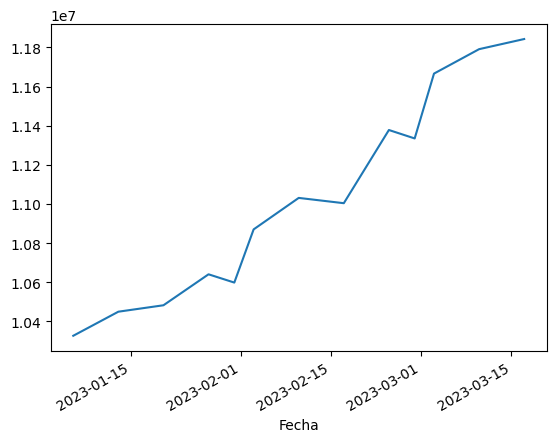

In [270]:
Pasivos_fr['Suma Pasivos'].plot()


In [262]:
def formatear_valor(valor):
    return '{:,.2f}'.format(valor).replace('.', ' ').replace(',', '.').replace(' ',',')

# Aplicamos la función a cada celda del DataFrame   
Pasivos_fr = Pasivos_fr.applymap(formatear_valor)

In [236]:
# Llamamos a la función get_fridays_close para obtener el DataFrame que contiene los valores de los viernes y últimos días hábiles de cada mes de 2023
Dashboard_fr = get_fridays_close(2023, Dashboard)
Dashboard_fr= Dashboard_fr.set_index('Fecha')

In [237]:
def formatear_valor(valor):
    return '{:,.2f}'.format(valor).replace('.', ' ').replace(',', '.').replace(' ',',')

# Aplicamos la función a cada celda del DataFrame
Dashboard_fr = Dashboard_fr.applymap(formatear_valor)

In [238]:
Dashboard_fr['Depositos del Sector Privado']

Fecha
2023-01-06    16.321,00
2023-01-13    16.244,00
2023-01-20    16.213,00
2023-01-27    16.270,00
2023-01-31    16.337,00
2023-02-03    16.314,00
2023-02-10    16.412,00
2023-02-17    16.426,00
2023-02-24    16.352,00
2023-02-28    16.359,00
2023-03-03    16.390,00
2023-03-10    16.393,00
2023-03-17    16.379,00
Name: Depositos del Sector Privado, dtype: object

UNIMOS DOS DATAFRAMES PARA GRAFICAR EN CONJUNTO DOS VARIABLES 

In [381]:

import pandas as pd
import matplotlib.pyplot as plt

# Combina los dos dataframes en uno solo usando la columna de fecha como clave
df = pd.merge(Depositos, RI, on='Fecha', how='outer')

df= df.set_index('Fecha')

df= df.groupby(df.index).first()


Máximos del DataFrame. Queremos saber en qué fecha se alcanzó el máximo de depósitos y Reservas Internacionales

In [401]:
# Encontrar el valor máximo en la columna 
max_depositos = df['Depositos del Sector Privado'].max()

# Encontrar la posición donde se encuentra el valor máximo en la columna 
posicion_max_depositos = df['Depositos del Sector Privado'].idxmax()

# Imprimir el valor máximo y la posición
print("El valor máximo de depositos es:", max_depositos)
print("Se encuentra en la posición:", posicion_max_depositos)
# Encontrar el valor máximo en la columna 
max_ri = df['Total Reservas Internacionales'].max()

# Encontrar la posición donde se encuentra el valor máximo en la columna 
posicion_max_ri= df['Total Reservas Internacionales'].idxmax()

# Imprimir el valor máximo y la posición
print("El valor máximo de reservas es:", max_ri)
print("Se encuentra en la posición:", posicion_max_ri)

El valor máximo de depositos es: 32492.0
Se encuentra en la posición: 2019-08-09 00:00:00
El valor máximo de reservas es: 77481.0
Se encuentra en la posición: 2019-04-09 00:00:00


In [415]:
df.iloc[df.index == '2019-08-09']

,Depositos del Sector Privado,Total Reservas Internacionales
Fecha,,
2019-08-09,32492.0,66308.5


VISUALIZAMOS EL DATA FRAME, USANDO ADEMÁS EL VALOR MÁXIMO ENCONTRADO COMO UNA ANOTACIÓN EN EL GRAFICO E INSERTANDO UN LOGO

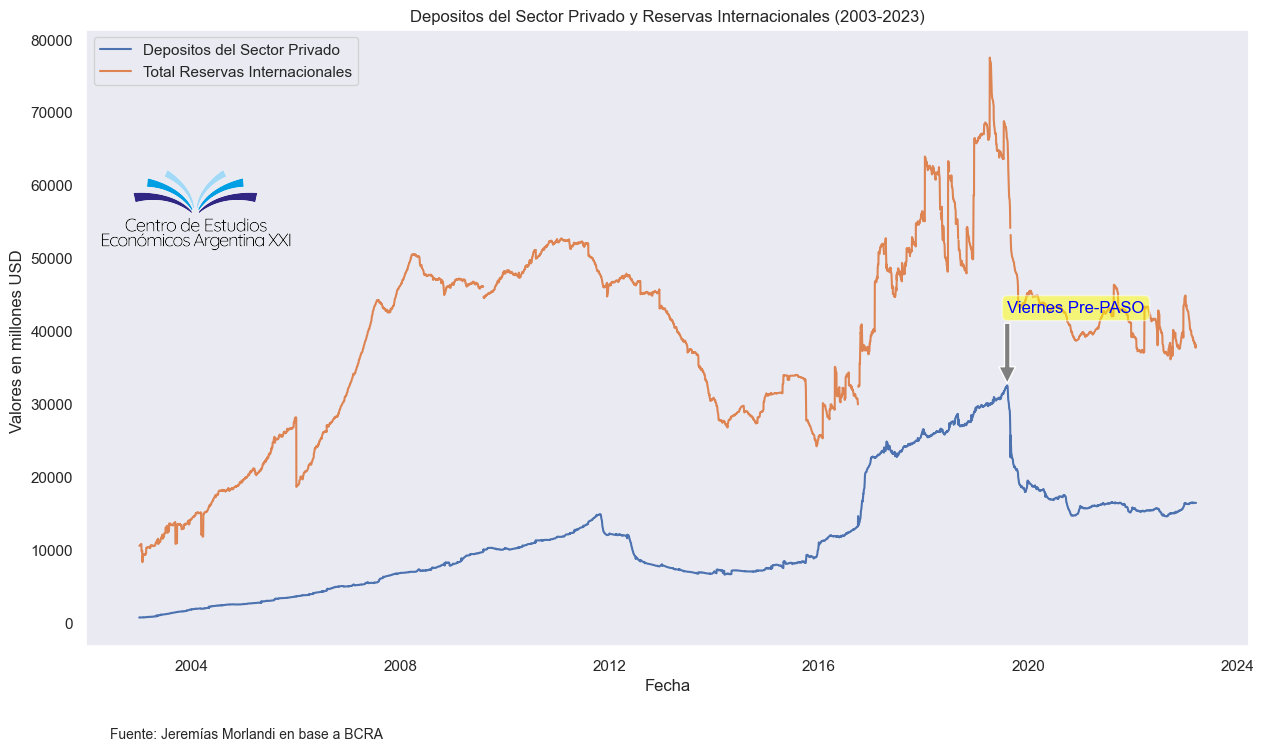

In [468]:
from skimage import io, transform

fig, ax= plt.subplots()

ax.plot(df[['Depositos del Sector Privado', 'Total Reservas Internacionales']])

# Personalización la apariencia del gráfico
ax.set_xlabel('Fecha')

# Cambiar la escala del eje y a millones
ax.ticklabel_format(axis='y', style='sci')
ax.yaxis.offsetText.set_visible(False)
ax.grid(False) #Para sacarle el fondo de cuadricula al grafico
# Añadir una anotación en la posición para el valor máximo
ax.annotate('Viernes Pre-PASO', xy=(posicion_max_depositos, max_depositos), xytext=(posicion_max_depositos, max_depositos + 10000),
             fontsize=12, color='blue', 
             arrowprops=dict(facecolor='gray', shrink=0.03),
             bbox=dict(boxstyle='round', fc='yellow', alpha=0.5))

ax.set_ylabel ('Valores en millones USD ')
ax.legend(['Depositos del Sector Privado', 'Total Reservas Internacionales'])
ax.set_title('Depositos del Sector Privado y Reservas Internacionales (2003-2023)')

# Cargar la imagen
logo = plt.imread(r"C:\Users\home\Documents\Recurso 22.png")

# Reducir el tamaño de la imagen utilizando la función downscale_local_mean. Mientras más grandes los números, más se achica la imagen
logo_resized = transform.downscale_local_mean(logo, (25, 25, 1))

# Agregar la imagen al gráfico, el primer valor representa el eje horizontal y la segunda el vertical. 
plt.figimage(np.array(logo_resized), 100, 500)
plt.text(0.02, -0.15, "Fuente: Jeremías Morlandi en base a BCRA", transform=ax.transAxes, fontsize=10)
plt.rcParams['figure.dpi'] = 300


VARIACION DE LOS DEPOSITOS

In [514]:
df_2023= df.loc[(df.index >= '2022-12-30') & (df.index <= '2023-03-20')]


In [607]:
df_2023 = df[('Depositos del Sector Privado')]
df_2023 = pd.DataFrame (df_2023)



In [627]:
df_20231 = df_2023.loc['2022-12-30']
df_20232 = df_2023.loc['2023-03-20']

In [628]:
df_valor1 = df_20231['Depositos del Sector Privado']
df_valor2= df_20232['Depositos del Sector Privado']


In [629]:
df_valor1= df_valor1.astype(int)
df_valor2= df_valor2.astype(int)

In [630]:
variacion_porcentual = ((df_valor2 - df_valor1)/df_valor1)*100
variacion_porcentual = variacion_porcentual.round(2)


In [631]:
print ('El total de los depositos del sector privado al cierre de 2022 era: ' + str(df_valor1) + ' millones de dólares')
       
print ('El total de los depositos del sector privado al 20 de marzo era: ' + str(df_valor2) +  ' millones de dólares')
       
print('La variación de los dos depositos en lo que va del 2023 es: ' + str(variacion_porcentual)+ '%' )

El total de los depositos del sector privado al cierre de 2022 era: 16358 millones de dólares
El total de los depositos del sector privado al 20 de marzo era: 16379 millones de dólares
La variación de los dos depositos en lo que va del 2023 es: 0.13%
